# PV056 project

### Follow the instructions and run the cells in this notebook to reproduce all the results.

In [1]:
!pip3 install -r requirements.txt


[notice] A new release of pip available: 22.2.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import random

import requests
import pandas as pd
import matplotlib.pyplot as plt


os.environ["WANDB_DISABLED"] = "true"

## Load the datasets

In [3]:
# Uncomment if you want to download the dataset yourself
dataset_parts = ["train", "test", "valid"]
# for dataset_part in dataset_parts:
#     url = f"https://raw.githubusercontent.com/food-hazard-detection-semeval-2025/food-hazard-detection-semeval-2025.github.io/refs/heads/main/data/incidents_{dataset_part}.csv"
#     response = requests.get(url)
#
#     with open(f"incidents_{dataset_part}.csv", "wb") as f:
#         f.write(response.content)

trainset = pd.read_csv('incidents_train.csv', index_col=0)
validset = pd.read_csv('incidents_valid.csv', index_col=0)
testset = pd.read_csv('incidents_valid.csv', index_col=0)


## Explore the data

In [76]:
trainset.sample()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
2376,2017,10,4,us,H-E-B Meat Plant Recalls Poultry Products Due ...,"WASHINGTON, Oct. 3, 2017 – H-E-B Meat Plant, a...",allergens,"meat, egg and dairy products",cereals containing gluten and products thereof,chilled chicken thighs


In [77]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5082 entries, 0 to 5983
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5082 non-null   int64 
 1   month             5082 non-null   int64 
 2   day               5082 non-null   int64 
 3   country           5082 non-null   object
 4   title             5082 non-null   object
 5   text              5082 non-null   object
 6   hazard_category   5082 non-null   object
 7   product_category  5082 non-null   object
 8   hazard            5082 non-null   object
 9   product           5082 non-null   object
dtypes: int64(3), object(7)
memory usage: 436.7+ KB


In [80]:
trainset.head()

,year,month,day,country,title,text,hazard_category,product_category,hazard,product
0,1994,1,7,us,Recall Notification: FSIS-024-94,Case Number: 024-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,smoked sausage
1,1994,3,10,us,Recall Notification: FSIS-033-94,Case Number: 033-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria spp,sausage
2,1994,3,28,us,Recall Notification: FSIS-014-94,Case Number: 014-94 \n Date Opene...,biological,"meat, egg and dairy products",listeria monocytogenes,ham slices
3,1994,4,3,us,Recall Notification: FSIS-009-94,Case Number: 009-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,thermal processed pork meat
4,1994,7,1,us,Recall Notification: FSIS-001-94,Case Number: 001-94 \n Date Opene...,foreign bodies,"meat, egg and dairy products",plastic fragment,chicken breast


In [82]:
for i in range(10):
    x = random.randint(0, len(trainset))
    print(trainset["text"][x])       # change the column name to view another column data
    print()
    print("XXX")
    print()

PRA No. 2003/6390 Date published 5 Aug 2003 Product description 100g Cellophane pack. All Use By Dates. Imported from China. Distributed in WA and Qld. What are the defects? Contain undeclared milk protein. Consumers who suffer from a milk protein allergy or intolerance should not consume these products. What are the hazards? Allergic Reaction What should consumers do? Consumers who have a milk protein allergy or intolerance are asked to return the product to the point of purchase for a full refund. For further information contact Foodland Associated Ltd on 1800 880 078. Supplier Foodland Associated Ltd Where the product was sold Queensland Western Australia Coordinating agency Food Standards Australia New Zealand is the coordinating agency for this recall. Product category Groceries × Close

XXX

Bloomingdale, Ill. – NOW Health Group, Inc. is voluntarily recalling limited quantities of six dietary supplements that are mislabeled due to a printing error from the label supplier. The rec

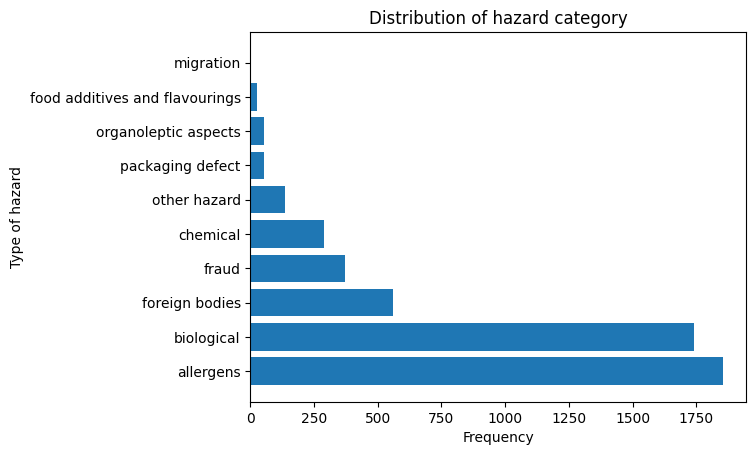

In [89]:
#DISTRIBUTION OF HAZARDS IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['hazard_category'].value_counts().index.to_list(), trainset['hazard_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Frequency')
plt.ylabel('Type of hazard')
plt.title('Distribution of hazard category')
plt.show()

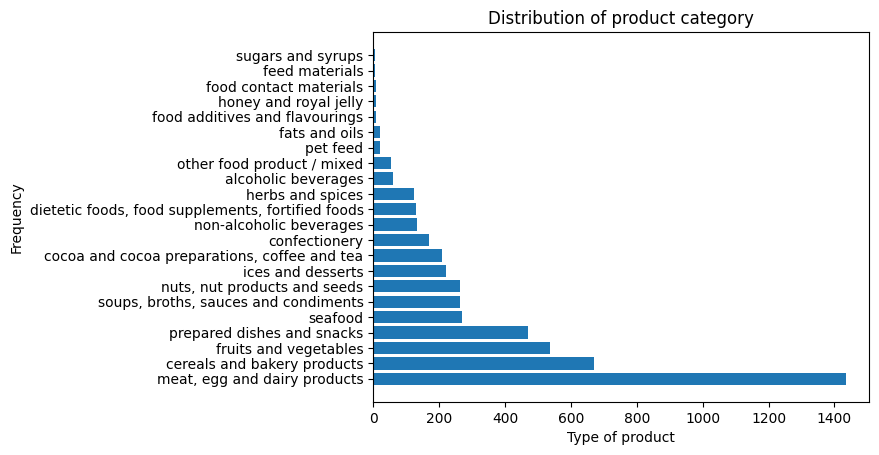

In [90]:
#DISTRIBUTION OF PRODUCT TYPES IN DATASET
fig, ax = plt.subplots()

ax.barh(trainset['product_category'].value_counts().index.to_list(), trainset['product_category'].value_counts().values, orientation='horizontal')

plt.xlabel('Type of product')
plt.ylabel('Frequency')
plt.title('Distribution of product category')
plt.show()


## Generate synthetic data for rare product and hazard categories

In [91]:
from food_hazard_detection.balance_dataset import (generate_prompt_triplets_by_hazard, generate_prompt_triplets_by_product,
                             generate_synthetic_data)

from food_hazard_detection.settings import FILES_DIR, SYNTHETIC_DATA_DIR

rare_hazard_categories = ["migration", "food additives and flavourings",
                              "organoleptic aspects", "packaging defect"]
rare_product_categories = ["sugars and syrups", "feed materials", "food contact materials",
                           "honey and royal jelly", "food additives and flavourings", "fats and oils",
                           "pet feed", "other food product / mixed", "alcoholic beverages"]

In [92]:
combinations_hazard = generate_prompt_triplets_by_hazard(rare_hazard_categories, trainset)
# Uncomment if you want really to generate the data. It takes some time.
# generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_hazard.csv",
#                         FILES_DIR / "prompts/generate_synthetic_data.md", combinations_hazard)

combinations_product = generate_prompt_triplets_by_product(rare_product_categories, trainset)
# generate_synthetic_data(SYNTHETIC_DATA_DIR / "synthetic_data_product.csv",
#                         FILES_DIR / "prompts/generate_synthetic_data.md", combinations_product)

print("Number of to-be generated synthetic data points:", len(combinations_hazard)+len(combinations_product))

Number of generated synthetic data points: 400


The data produced by Mistral are not perfect. So at this point some manual curration is needed (e.g. quote the text column to parse the csv properly or drop some rows with missing values). Because of that, we use later in the code already preprocessed synthetic data.

Load and check the generated data.
We generated smaller and bigger amount of synthetic data and we want to test whether it has some impact on performance.

In [96]:
synthetic_data_small = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_small.csv")
print(synthetic_data_small.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              83 non-null     int64 
 1   month             83 non-null     int64 
 2   day               83 non-null     int64 
 3   country           83 non-null     object
 4   title             83 non-null     object
 5   text              83 non-null     object
 6   hazard_category   83 non-null     object
 7   product_category  83 non-null     object
 8   hazard            83 non-null     object
 9   product           83 non-null     object
dtypes: int64(3), object(7)
memory usage: 6.6+ KB
None


In [95]:
synthetic_data_big = pd.read_csv(SYNTHETIC_DATA_DIR / "synthetic_data_big.csv")
print(synthetic_data_big.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              344 non-null    int64 
 1   month             344 non-null    int64 
 2   day               344 non-null    int64 
 3   country           344 non-null    object
 4   title             344 non-null    object
 5   text              344 non-null    object
 6   hazard_category   344 non-null    object
 7   product_category  344 non-null    object
 8   hazard            344 non-null    object
 9   product           344 non-null    object
dtypes: int64(3), object(7)
memory usage: 27.0+ KB
None


In [98]:
train_with_small = pd.concat([trainset, synthetic_data_small])
train_with_big = pd.concat([trainset, synthetic_data_big])
train_with_big.info()
train_with_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5426 entries, 0 to 343
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5426 non-null   int64 
 1   month             5426 non-null   int64 
 2   day               5426 non-null   int64 
 3   country           5426 non-null   object
 4   title             5426 non-null   object
 5   text              5426 non-null   object
 6   hazard_category   5426 non-null   object
 7   product_category  5426 non-null   object
 8   hazard            5426 non-null   object
 9   product           5426 non-null   object
dtypes: int64(3), object(7)
memory usage: 466.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5165 entries, 0 to 82
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              5165 non-null   int64 
 1   month             5165 non-null   int64 
 2   day   

### Preprocess the data


1. As we intend to use, among ther models, a TF-IDF-based model, it is necessary to remove stop words and punctuation, then apply tokenization and lemmatization.

In [19]:
from food_hazard_detection.preprocessing import preprocessing

In [ ]:
trainset['text_preprocessed'] = trainset.text.apply(lambda x: preprocessing(x))
validset['text_preprocessed'] = validset.text.apply(lambda x: preprocessing(x))
testset['text_preprocessed'] = testset.text.apply(lambda x: preprocessing(x))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\haemk/nltk_data'
    - 'C:\\Users\\haemk\\SemEval2025\\.venv\\nltk_data'
    - 'C:\\Users\\haemk\\SemEval2025\\.venv\\share\\nltk_data'
    - 'C:\\Users\\haemk\\SemEval2025\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\haemk\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


### Load high-level features from text with LLM (gpt-4o-mini)

In [105]:
from food_hazard_detection.preprocessing import process_txt_files

In [109]:
folder_path = FILES_DIR / "datasets/llm_features/outputs"
df_llm_feats = process_txt_files(folder_path, "hazard")
df_llm_feats

,id,custom_id,product_type,hazard_type,recall_reason,contaminant_type,distribution_area,recall_action,affected_population,recall_date,...,allergen_type,recall_severity,product_origin,consumer_advice,recall_source,product_batch_code,recall_notification_method,product_size,recall_frequency,recall_duration
0,batch_req_67f8e745917481909a25a7c49dfcb645,0,Chicken,biological,Contamination,Listeria,National,Product Recall,General Public,1994-07-01,...,Other,Class 1,USA,Do Not Consume,USDA,024-94,Press Release,"2,894",Low,Medium
1,batch_req_67f8e745a2648190a8924db8613ebee3,1,Other,biological,Contamination,Listeria,National,Product Recall,General Public,1994-10-03,...,Other,Class 1,USA,Do Not Consume,USDA,N/A,Press Release,"5,500",Low,Long
2,batch_req_67f8e745b3ec81908877fd1900fdad4b,2,Other,biological,Contamination,Listeria,National,Product Recall,General Public,1994-03-28,...,Other,Class 1,USA,Do Not Consume,USDA,014-94,Press Release,"3,950",Low,Medium
3,batch_req_67f8e745c7e08190ab5eab8a33796e44,3,Other,foreign bodies,Contamination,Plastic,National,Product Recall,General Public,1994-03-04,...,Other,Class 2,USA,Do Not Consume,USDA,009-94,Press Release,"16,164 pounds",Low,Medium
4,batch_req_67f8e745da708190b36448f0d537e549,4,Chicken,foreign bodies,Contamination,Plastic,National,Product Recall,General Public,1994-01-07,...,Other,Class 1,USA,Do Not Consume,USDA,001-94,Press Release,"46,168 pounds",Low,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6639,batch_req_67fa7ba957208190ab33c663f71244e0,6639,Chicken,allergens,Undeclared Allergen,Other,National,Product Recall,General Public,2022-07-21,...,Other,Class 2,Canada,Do Not Consume,CFIA,"LOT 016522, LOT 016422, LOT 013622, LOT 012922...",Email,"450 g, 1 kg",Medium,Short
6640,batch_req_67fa7ba969988190a57ab337c8dcfe85,6640,Other,biological,Contamination,Salmonella,Regional,Product Recall,General Public,2022-07-22,...,Other,Class 1,USA,Return for Refund,Other,"22-102, 22-103, 22-130, 22-194",Press Release,1-pound,Low,Short
6641,batch_req_67fa7ba97d40819083880aa9f4629d1b,6641,Seafood,biological,Contamination,Listeria,National,Product Recall,Pregnant Women,2022-07-26,...,Other,Class 1,Australia,Return for Refund,Other,"1- 14:181 | 2- 14:174 | 3- 14:180 | 4- 14:171,...",Press Release,"150g, 100g, 250g, 500g, 1kg",Medium,Short
6642,batch_req_67fa7ba98d488190989c7d46d1595de9,6642,Snack,chemical,Contamination,Other,International,Product Recall,General Public,2022-07-27,...,Other,Class 2,Other,Do Not Consume,Other,Other,In-Store Notice,Other,Low,Short


In [111]:
df_llm_feats = df_llm_feats.drop(columns=["id", "custom_id", "recall_date", "company_name", "product_batch_code", 'product_size'], errors='ignore')


for col in df_llm_feats.columns:
    df_llm_feats[col] = df_llm_feats[col].apply(lambda x: str(x) if isinstance(x, list) else x)

df_llm_feats = pd.get_dummies(df_llm_feats, sparse=False, prefix_sep='_')

In [112]:
from sklearn.metrics import f1_score

def compute_score(hazards_true, products_true, hazards_pred, products_pred):
    # compute f1 for hazards:
    f1_hazards = f1_score(
        hazards_true,
        hazards_pred,
        average='macro'
    )
    print(f"F1 for hazard_category: {round(f1_hazards, 2)}")
    # compute f1 for products:
    f1_products = f1_score(
        products_true[hazards_pred == hazards_true],
        products_pred[hazards_pred == hazards_true],
        average='macro'
    )
    print(f"F1 for product_category: {round(f1_products, 2)}")
    return (f1_hazards + f1_products) / 2.


# Sub-Task 1 - LLM features only
This task consists of predicting 2 category labels:
- hazard_category: the type of hazard (e.g. microbiological, chemical, etc.)
- product_category: the type of product (e.g. meat, fish, etc.)

Observed metric: weighted F1 score - hazard_category is preffered

### hazard_category

In [114]:
#features
X_train = df_llm_feats.iloc[:trainset.shape[0]]
X_val = df_llm_feats.iloc[trainset.shape[0]:trainset.shape[0] + validset.shape[0]]
X_test = df_llm_feats.tail(testset.shape[0])
#labels
y_train = trainset['hazard_category']
y_val = validset['hazard_category']
y_test = testset['hazard_category']

In [115]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


model = RandomForestClassifier(random_state=42)

param_dist = {
    "n_estimators": [50, 100, 200, 400],       # Počet stromů v lese
    "max_depth": [3, 5, 10, None],        # Maximální hloubka stromu
    "min_samples_split": [2, 5, 10],      # Minimální počet vzorků pro split
    "min_samples_leaf": [1, 2, 5, 10],        # Minimální počet vzorků v listu
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=10,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best paramaters: ", random_search.best_params_)
print("Best score on training CV: ", random_search.best_score_)
hazard_true = y_val

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\haemk\SemEval2025\.venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best paramaters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score on training CV:  0.6550655926109685


In [10]:
best_model = random_search.best_estimator_
hazard_pred = best_model.predict(X_val)
print("Classification report na testu:")
print(classification_report(hazard_true ,hazard_pred, zero_division=0))

Classification report na testu:
                                precision    recall  f1-score   support

                     allergens       0.94      0.99      0.96       207
                    biological       0.96      0.97      0.97       194
                      chemical       0.86      0.89      0.88        28
food additives and flavourings       0.00      0.00      0.00         2
                foreign bodies       0.97      0.97      0.97        63
                         fraud       0.71      0.61      0.66        41
          organoleptic aspects       0.67      0.50      0.57         8
                  other hazard       0.38      0.36      0.37        14
              packaging defect       0.67      0.50      0.57         8

                      accuracy                           0.92       565
                     macro avg       0.69      0.64      0.66       565
                  weighted avg       0.91      0.92      0.91       565



### product_category

In [11]:
y_train = trainset['product_category']
y_val = validset['product_category']

In [12]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=10,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best paramaters: ", random_search.best_params_)
print("Best score on training CV: ", random_search.best_score_)
product_true = y_val

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\vojta\miniconda3\envs\food-hazard-detection\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best paramaters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score on training CV:  0.3571138568586496


In [13]:
best_model = random_search.best_estimator_
product_pred = best_model.predict(X_val)
print("Classification report na testu:")
print(classification_report(product_true, product_pred, zero_division=0))

Classification report na testu:
                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.75      0.43      0.55         7
                      cereals and bakery products       0.38      0.49      0.43        75
     cocoa and cocoa preparations, coffee and tea       0.55      0.73      0.63        15
                                    confectionery       0.36      0.15      0.22        26
dietetic foods, food supplements, fortified foods       0.43      0.21      0.29        14
                                    fats and oils       1.00      0.50      0.67         4
                                   feed materials       1.00      1.00      1.00         1
                   food additives and flavourings       0.00      0.00      0.00         0
                            fruits and vegetables       0.47      0.48      0.48        52
                                 herbs and spices       0

### Sub-Task 1 results:

In [15]:
print(f"Final ST1 F1 score: {round(compute_score(hazard_true, product_true, hazard_pred, product_pred), 2)}")

F1 for hazard-category: 0.66
F1 for product-category: 0.46
Final ST1 F1 score: 0.56


# Sub-Task 2 - LLM features only
This task consists of predicting 2 concrete labels:
- hazard - the type of hazard (e.g. salmonella, etc.)
- product -  the type of product (e.g. chicken, etc.)

Observed metric: weighted F1 score - hazard is preffered

### hazard

In [16]:
#features
X_train = df_llm_feats.iloc[:trainset.shape[0]]
X_val = df_llm_feats.iloc[trainset.shape[0]:trainset.shape[0] + validset.shape[0]]
X_test = df_llm_feats.tail(testset.shape[0])
#labels
y_train = trainset['hazard']
y_val = validset['hazard']
y_test = testset['hazard']


model = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=10,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best paramaters: ", random_search.best_params_)
print("Best score on training CV: ", random_search.best_score_)
hazard_true = y_val

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\vojta\miniconda3\envs\food-hazard-detection\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best paramaters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best score on training CV:  0.31892224149112003


In [17]:
best_model = random_search.best_estimator_
hazard_pred = best_model.predict(X_val)
print("Classification report na testu:")
print(classification_report(hazard_true ,hazard_pred, zero_division=0))

Classification report na testu:
                                                 precision    recall  f1-score   support

                                      Aflatoxin       1.00      1.00      1.00         1
                                 abnormal smell       0.00      0.00      0.00         1
                                      allergens       0.00      0.00      0.00         1
                                         almond       0.24      0.71      0.36         7
                         antibiotics, vet drugs       0.00      0.00      0.00         1
                                  bacillus spp.       0.00      0.00      0.00         2
                           bad smell / off odor       0.00      0.00      0.00         1
                                  bone fragment       1.00      1.00      1.00         1
                                     brazil nut       0.00      0.00      0.00         1
                              bulging packaging       0.50      0.33      0.4

### product


In [18]:
y_train = trainset['product']
y_val = validset['product']
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=20,
    cv=10,
    scoring="f1_macro",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best paramaters: ", random_search.best_params_)
print("Best score on training CV: ", random_search.best_score_)
product_true = y_val

Fitting 10 folds for each of 20 candidates, totalling 200 fits


C:\Users\vojta\miniconda3\envs\food-hazard-detection\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Best paramaters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best score on training CV:  0.08314619760651557


In [94]:
best_model = random_search.best_estimator_
product_pred = best_model.predict(X_val)
print("Classification report na testu:")
print(classification_report(product_true, product_pred, zero_division=0))

NameError: name 'random_search' is not defined

### Sub-Task 2 results:

In [20]:
print(f"Final ST2 F1 score: {round(compute_score(hazard_true, product_true, hazard_pred, product_pred), 2)}")

F1 for hazard-category: 0.33
F1 for product-category: 0.09
Final ST2 F1 score: 0.21


### BERT and RoBERTa

In [10]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, BertTokenizer, BertForSequenceClassification, DataCollatorWithPadding
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
def assign_labels(dataset, column, label_dict):
    # autoencoding
    unique_values = dataset[column].unique()
    for value in unique_values:
        if value not in label_dict:
            label_dict[value] = len(label_dict)


def transform_dataset(dataset):
    for split in dataset.keys():
        dataset[split] = dataset[split].replace({
            "hazard_category": labels_hazard_categories,
            "product_category": labels_product_categories,
            "product": labels_products,
            "hazard": labels_hazards
        })
        dataset[split]["text"] = dataset[split]["title"] + ": " + dataset[split]["text"]
        dataset[split] = dataset[split].drop(columns=["day", "month", "year", "country", "title"])

    return dataset

def compute_score(hazards_true, products_true, hazards_pred, products_pred):
    # compute f1 for hazards:
    f1_hazards = f1_score(
        hazards_true,
        hazards_pred,
        average='macro'
    )
    print("Hazard score", f1_hazards)
    # compute f1 for products:
    f1_products = f1_score(
        products_true,
        products_pred,
        average='macro'
    )
    print("Product score", f1_products)
    return (f1_hazards + f1_products) / 2.

In [ ]:
labels_hazard_categories = {}
labels_hazards = {}
labels_product_categories = {}
labels_products = {}

unique_products = set()
for split in [trainset, validset, testset]:
    unique_products.update(split["product"])

assign_labels(trainset, "hazard_category", labels_hazard_categories)
assign_labels(trainset, "hazard", labels_hazards)
assign_labels(trainset, "product_category", labels_product_categories)

for value in unique_products:
    if value not in labels_products:
        labels_products[value] = len(labels_products)

In [ ]:
bert_dataset = transform_dataset({"train": trainset.copy(), "valid": validset.copy(), "test": testset.copy()})

In [ ]:
bert_dataset = DatasetDict({"train" : Dataset.from_pandas(bert_dataset["train"]),"valid" : Dataset.from_pandas(bert_dataset["valid"]), "test" : Dataset.from_pandas(bert_dataset["test"])})

In [ ]:
bert_tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

def bert_tokenize_function(examples):
    return bert_tokenizer(examples["text"], truncation=True, padding="max_length")

In [ ]:
bert_tokenized = bert_dataset.map(bert_tokenize_function, batched=True)

In [ ]:
bert_data_collator = DataCollatorWithPadding(tokenizer=bert_tokenizer)

bert_training_args = TrainingArguments("test_trainer",
    num_train_epochs=3,
    weight_decay=0.01,
    eval_strategy="epoch")

In [ ]:
bert_trainers = dict()

for label in ['product', 'hazard', 'product_category', 'hazard_category']:
    train_dataset = bert_tokenized["train"].rename_column(label, "label")
    eval_dataset = bert_tokenized["valid"].rename_column(label, "label")

    bert_model = AutoModelForSequenceClassification.from_pretrained(
        "distilbert/distilbert-base-uncased", num_labels=len(label_encoders[label].classes_)
    )

    trainer = Trainer(
        model=bert_model,
        args=bert_training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        processing_class=bert_tokenizer,
        data_collator=bert_data_collator,
    )

    trainer.train()

    bert_trainers[label] = trainer

In [ ]:
devset_bert = dict()

for category in bert_trainers.keys():
    devset_bert[category] = bert_trainers[category].predict(bert_tokenized['test'])

In [ ]:
import numpy
print(f"Score Sub-Task 1: {compute_score(bert_tokenized['test']['hazard_category'], bert_tokenized['test']['product_category'], devset_bert['hazard_category'].predictions.argmax(-1).tolist(), devset_bert['product_category'].predictions.argmax(-1).tolist()):.3f}")

print(f"Score Sub-Task 2: {compute_score(bert_tokenized['test']['hazard'], bert_tokenized['test']['product'], devset_bert['hazard'].predictions.argmax(-1), devset_bert['product'].predictions.argmax(-1)):.3f}")

### Roberta

In [ ]:
roberta_dataset = transform_dataset({"train": trainset.copy(), "valid": validset.copy(), "test": testset.copy()})

In [ ]:
roberta_dataset = DatasetDict({"train" : Dataset.from_pandas(roberta_dataset["train"]),"valid" : Dataset.from_pandas(roberta_dataset["valid"]), "test" : Dataset.from_pandas(roberta_dataset["test"])})

In [ ]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def roberta_tokenize_function(examples):
    return roberta_tokenizer(examples["text"], truncation=True, padding="max_length")

In [ ]:
roberta_tokenized = roberta_dataset.map(roberta_tokenize_function, batched=True)

In [ ]:
roberta_data_collator = DataCollatorWithPadding(tokenizer=roberta_tokenizer)

roberta_training_args = TrainingArguments("test_trainer",
                                  num_train_epochs=3,
                                  weight_decay=0.01,
                                  eval_strategy="epoch")

In [ ]:
roberta_trainers = dict()

for label in ['product', 'hazard', 'product_category', 'hazard_category']:
    train_dataset = roberta_tokenized["train"].rename_column(label, "label")
    eval_dataset = roberta_tokenized["valid"].rename_column(label, "label")

    roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=len(label_encoders[label].classes_))

    trainer = Trainer(
        model=roberta_model,
        args=roberta_training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        processing_class=roberta_tokenizer,
        data_collator=roberta_data_collator,
    )

    trainer.train()

    bert_trainers[label] = trainer

In [ ]:
devset_roberta = dict()

for category in bert_trainers.keys():
    devset_roberta[category] = roberta_trainers[category].predict(roberta_tokenized['test'])

In [ ]:
print(f"Score Sub-Task 1: {compute_score(bert_tokenized['test']['hazard_category'], bert_tokenized['test']['product_category'], devset_bert['hazard_category'].predictions.argmax(-1).tolist(), devset_bert['product_category'].predictions.argmax(-1).tolist()):.3f}")

print(f"Score Sub-Task 2: {compute_score(bert_tokenized['test']['hazard'], bert_tokenized['test']['product'], devset_bert['hazard'].predictions.argmax(-1), devset_bert['product'].predictions.argmax(-1)):.3f}")